In [3]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

In [4]:
def search(root, inorder):
    for i in range(len(inorder)):
        if(inorder[i]==root):
            return i

In [5]:
def search_in_level(inorder, levelorder):
    new_level = []
    for item in levelorder:
        if(item in inorder):
            new_level.append(item)
    return new_level

In [6]:
def construct_tree(inorder, levelorder):
    if(len(inorder)==1):
        top = levelorder.pop(0)
        root = Node(top)
        return root
    elif(len(levelorder)<1):
        return None
    top = levelorder.pop(0)
    print("top",top)
    print("in", inorder)
    root = Node(top)
    top_pos = search(top, inorder)
    new_level =search_in_level(inorder[0:top_pos],levelorder)
    root.left = construct_tree(inorder[0:top_pos], new_level)
    new_level =search_in_level(inorder[top_pos+1:],levelorder)
    root.right = construct_tree(inorder[top_pos+1:], new_level)
    return root

In [10]:
inorder = ["D", "B", "E", "A", "C", "F"]
levelorder = ["A", "B", "C", "D", "E", "F"]
root = None
root = construct_tree(inorder, levelorder)

top A
in ['D', 'B', 'E', 'A', 'C', 'F']
top B
in ['D', 'B', 'E']
top C
in ['C', 'F']


In [11]:
import matplotlib.pyplot as plt
import numpy as np
def drawBST_(T, x0, x1, y, y_inc,ax):
    if T is not None:
        xm = (x0+x1)/2
        yn = y-y_inc
        if T.left is not None:
            p=np.array([[xm,y], [(x0+xm)/2,yn]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            drawBST_(T.left,x0,xm,yn, y_inc,ax)
        if T.right is not None:
            p=np.array([[xm,y], [(x1+xm)/2,yn]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            drawBST_(T.right,xm,x1,yn, y_inc,ax)
        ax.text(xm,y, str(T.data), size=10,ha="center", va="center",
            bbox=dict(facecolor='w',boxstyle="circle"))

def drawBST(T): 
    #plt.close('all') 
    fig, ax = plt.subplots()
    drawBST_(T, 0, 800, 800, 80, ax)
    ax.set_aspect(1.0)
    ax.axis('off') 
    plt.show()

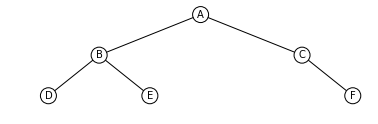

In [12]:
drawBST(root)